In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorly.decomposition import parafac2
import tensorly as tl
from tensorly.parafac2_tensor import parafac2_to_slice
from tensorly.metrics.regression import variance as tl_var
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from tfac.figures.figureCommon import subplotLabel, getSetup
from sklearn.metrics import roc_curve, roc_auc_score
from tfac.MRSA_dataHelpers import produce_outcome_bools, get_patient_info, form_MRSA_tensor
from tfac.tensor import R2Xparafac2

def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=False).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, tol=1e-7, n_iter_max=1000, random_state=random_state)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor

## tol=1e-7

In [16]:
_, statusID = get_patient_info()
outcomes = produce_outcome_bools(statusID)
components = 38
variance = 1
tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
patient_matrix = parafac2tensor[1][2]
score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
auc = roc_auc_score(outcomes, score_y)
print(auc)

KeyboardInterrupt: 

In [3]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

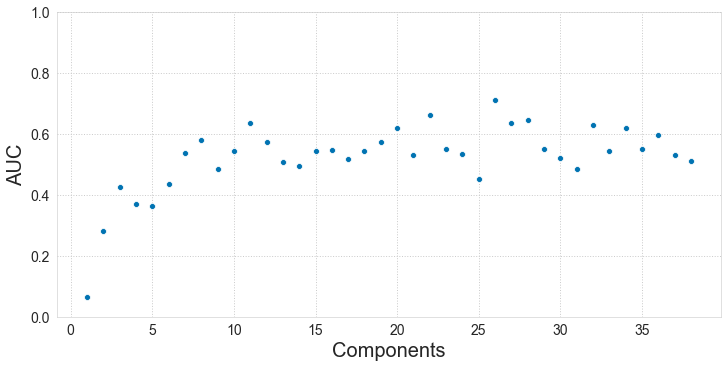

In [4]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [5]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

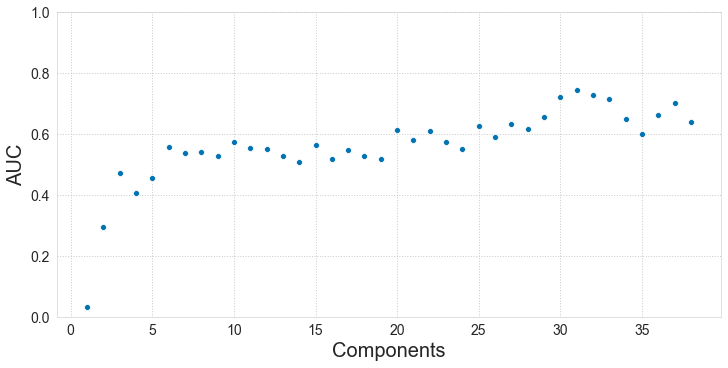

In [6]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [7]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

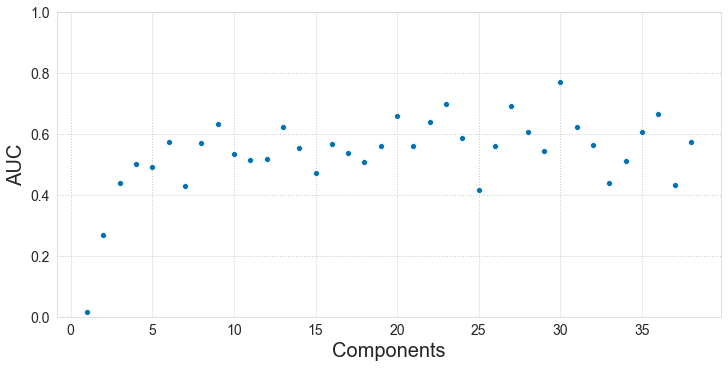

In [8]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [9]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

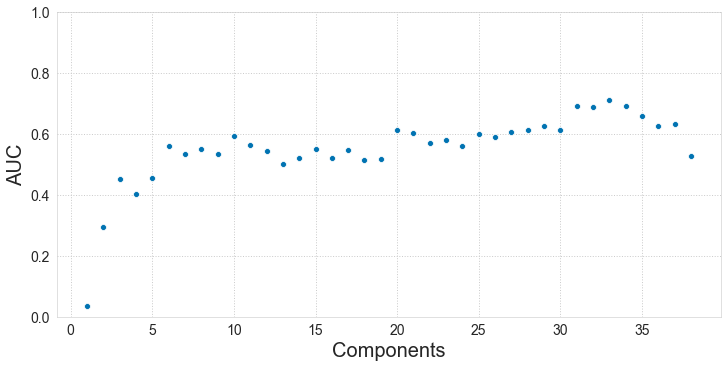

In [10]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [18]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

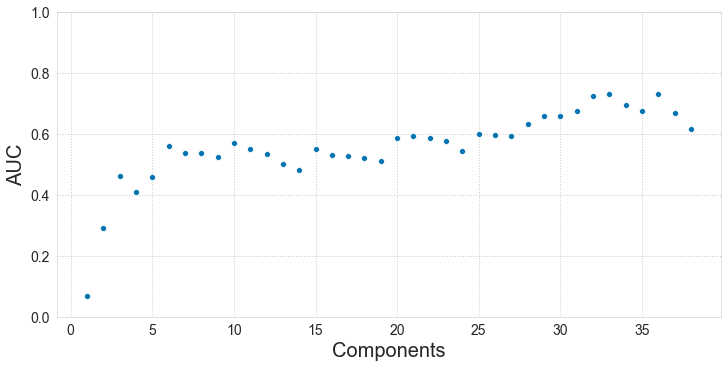

In [19]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [20]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

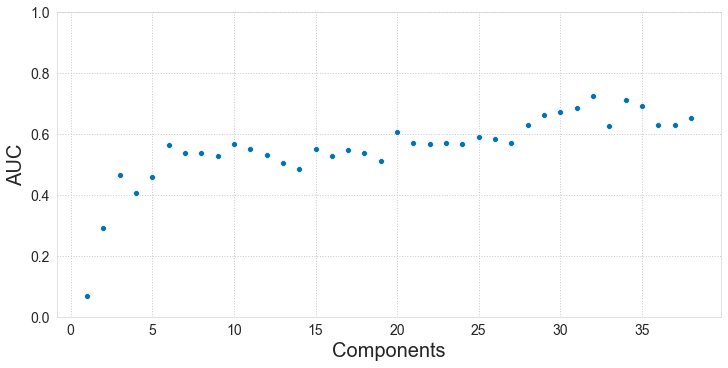

In [21]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

## fit intercept True

In [22]:
def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=True).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, tol=1e-9, n_iter_max=10000, random_state=random_state)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor

In [23]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

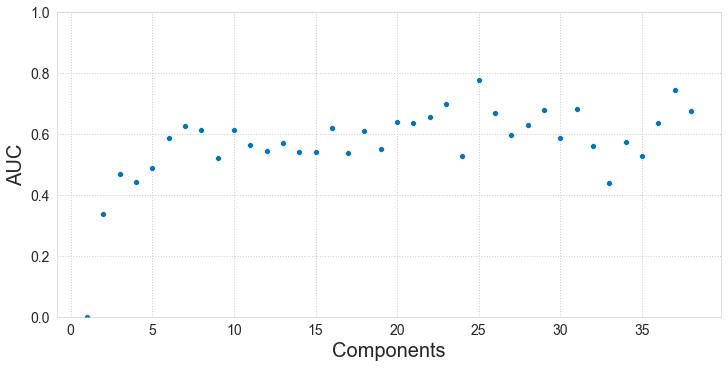

In [24]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [25]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

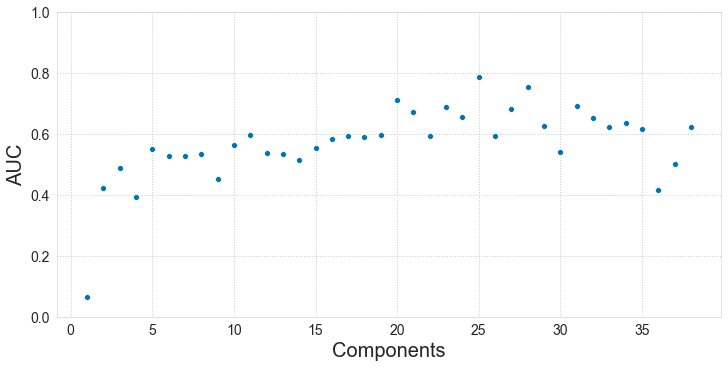

In [26]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [27]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

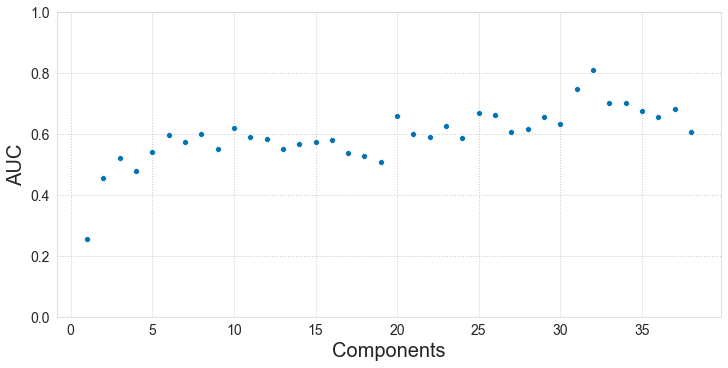

In [28]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [29]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

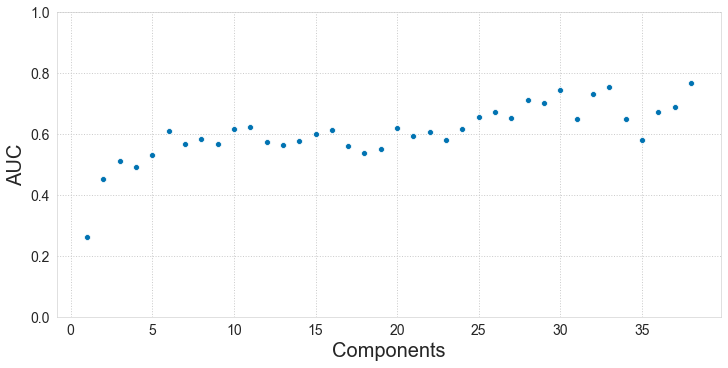

In [30]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [31]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

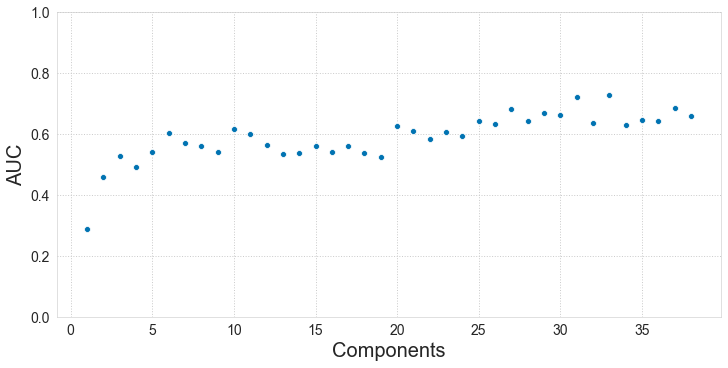

In [32]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

## tol = 1e-9

In [ ]:
def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=True).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, tol=1e-7, n_iter_max=10000, random_state=random_state)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
def importExpressionData():
    """import expression data"""
    df = pd.read_table(join(path_here, "tfac/data/mrsa/expression_counts_cohort1.txt"))
    df.drop(["Chr", "Start", "End", "Strand", "Length"], inplace=True, axis=1)
    return df

In [ ]:
dfexp = importExpressionData()
display(dfexp)